In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from lifelines import KaplanMeierFitter

# Load the data
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


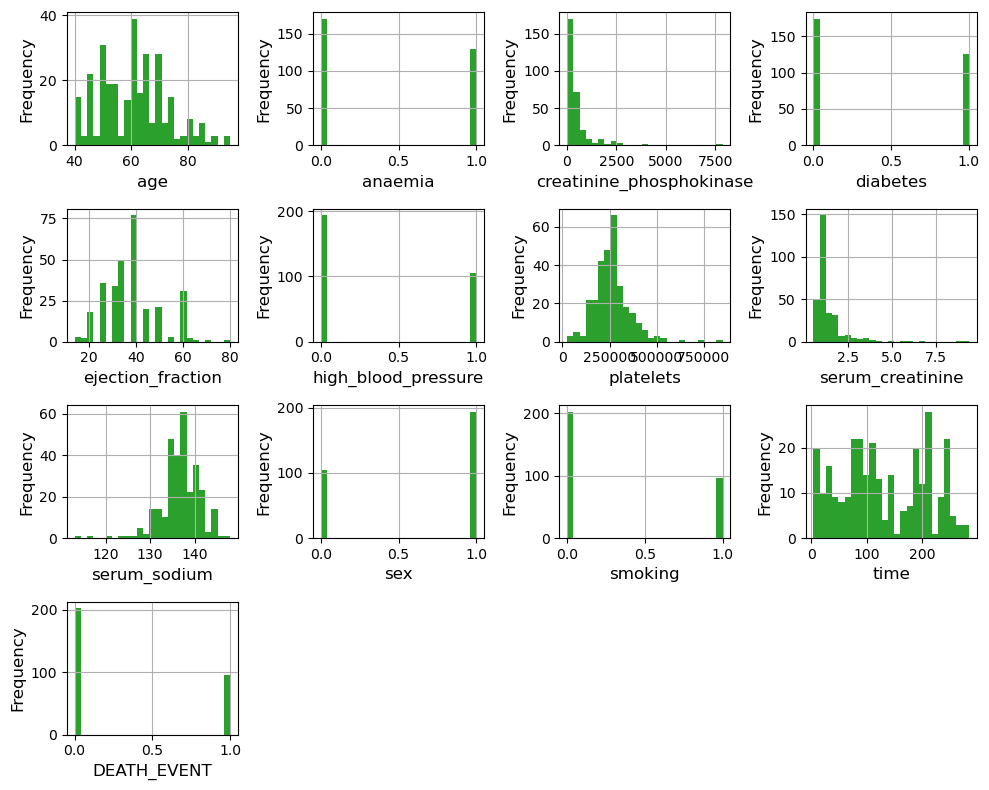

In [11]:
color = sns.color_palette()
column= df.columns.tolist()
fig = plt.figure(figsize = (10,8))
for i in range(13):
    plt.subplot(4,4,i+1)
    df[column[i]].hist(bins = 25,color = color[2])
    plt.xlabel(column[i],fontsize = 12)
    plt.ylabel('Frequency',fontsize = 12)
plt.tight_layout()

查看几个临床医学检测指标相关的连续变量之间的相关性

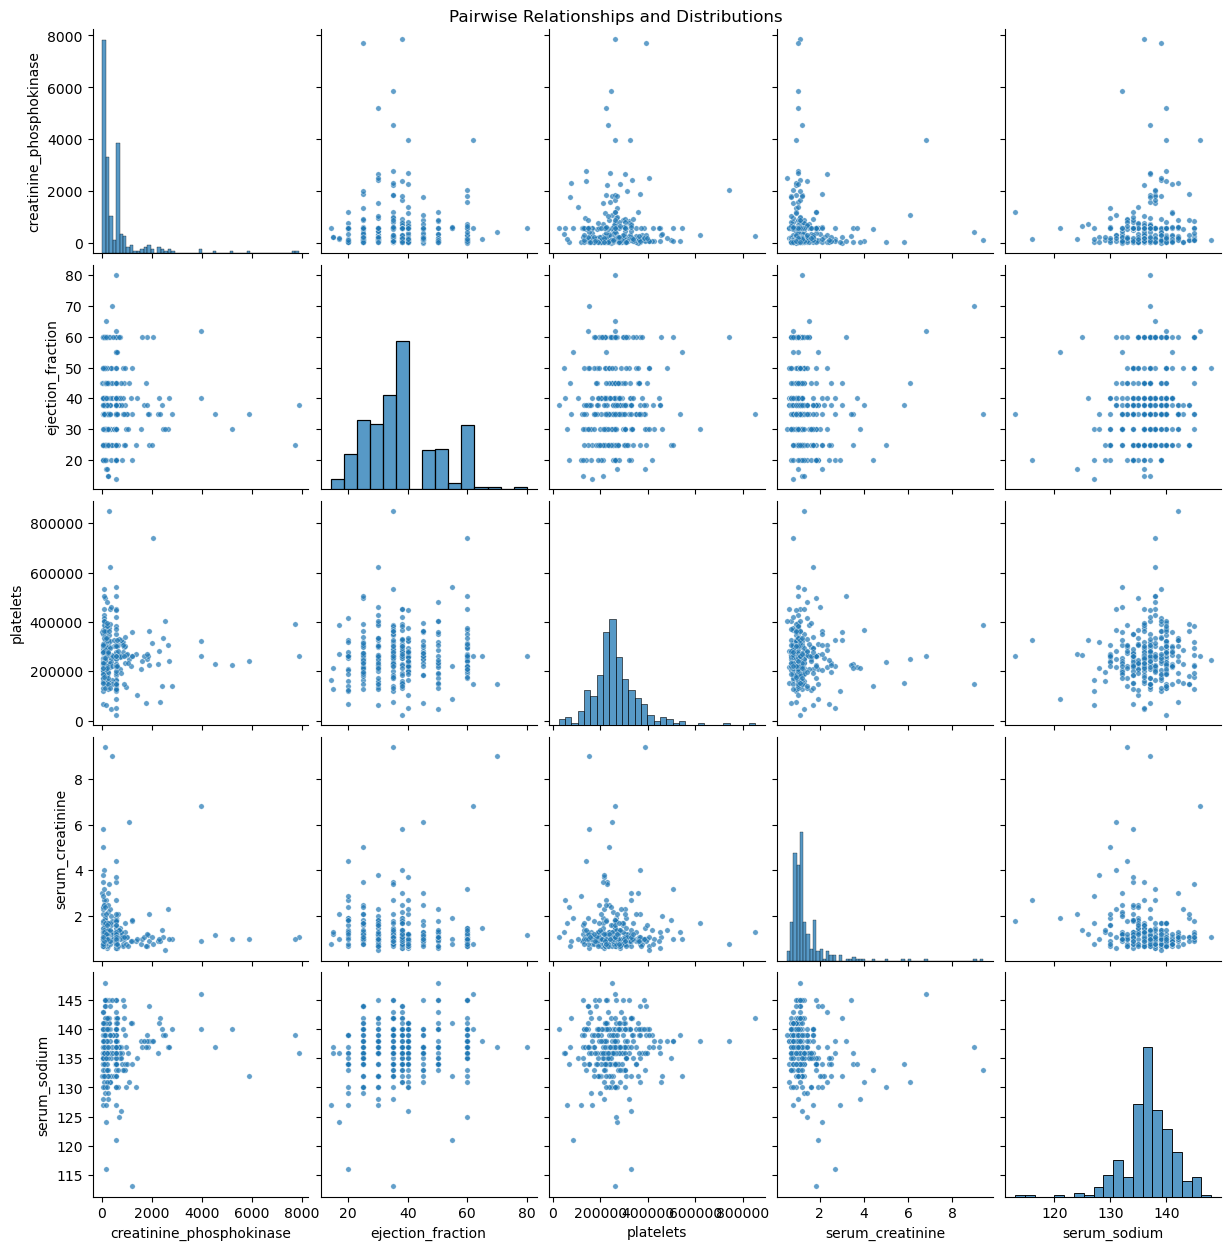

In [12]:
selected_columns = ['creatinine_phosphokinase', 
                   'ejection_fraction','platelets',
                   'serum_creatinine', 'serum_sodium']
selected_df = df[selected_columns]
sns.pairplot(selected_df, diag_kind='hist', plot_kws={'alpha': 0.7, 's': 15})
plt.suptitle("Pairwise Relationships and Distributions", y=1)
plt.show() 

查看相关系数热力图

Figure 8:Pairwise colleration plot


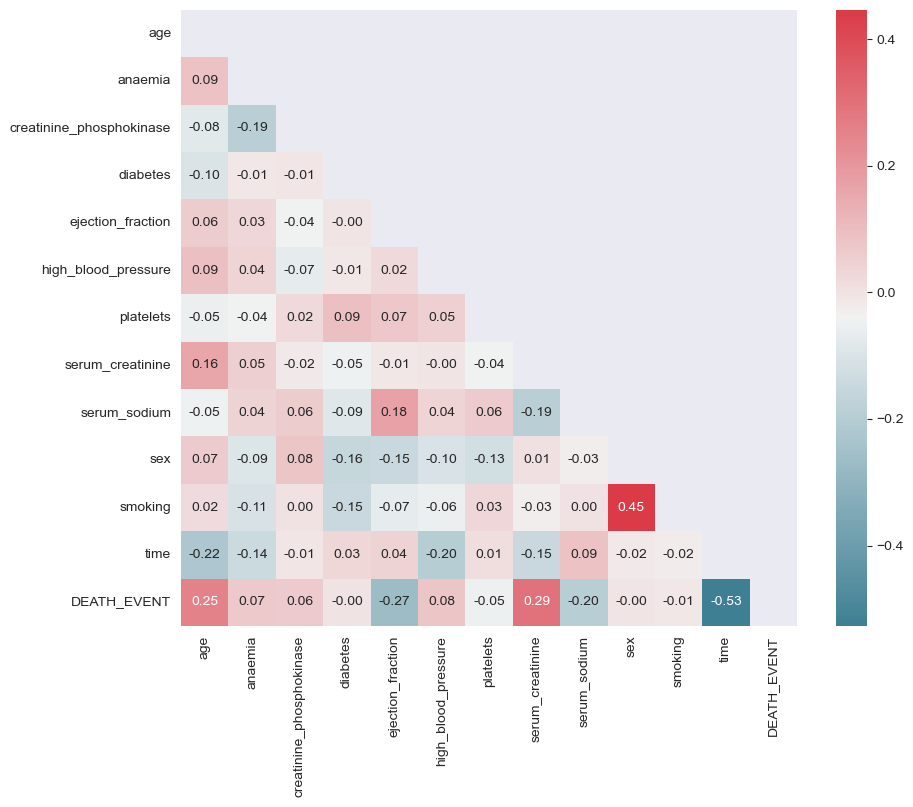

In [13]:
sns.set_style('dark')
plt.figure(figsize = (10,8))
mcorr = df[column].corr()
mask = np.zeros_like(mcorr,dtype = bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')

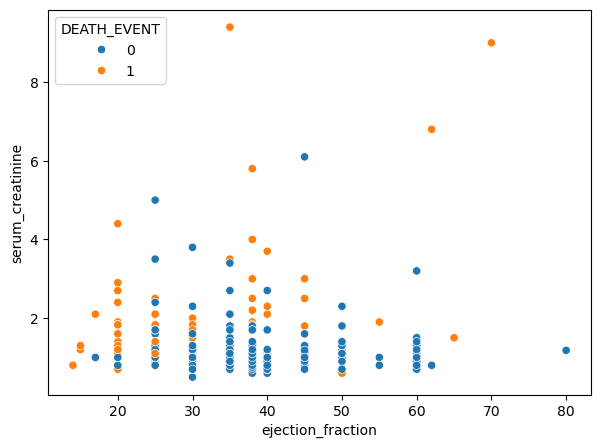

In [10]:
plt.figure(figsize = (7,5))
ax = sns.scatterplot(y='serum_creatinine', x='ejection_fraction', hue ='DEATH_EVENT', data = df)


In [9]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='newton-cg', max_iter=299)
log_reg.fit(df[['ejection_fraction','serum_creatinine']].values, df['DEATH_EVENT'].values)
log_reg.intercept_, log_reg.coef_


(array([0.40685443]), array([[-0.0597998 ,  0.72700747]]))

In [4]:
import statsmodels.api as sm
# Add the intercept item
X = sm.add_constant(df[['ejection_fraction', 'serum_creatinine']]) 
y = df['DEATH_EVENT']
logit_model = sm.Logit(y, X).fit(disp=0)  
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            2
Date:                Sun, 25 May 2025   Pseudo R-squ.:                  0.1359
Time:                        18:39:05   Log-Likelihood:                -162.16
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 8.308e-12
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3777      0.543      0.695      0.487      -0.687       1.443
ejection_fraction    -0.0599      0.013     -4.435      0.000      -0.086      -0.033
serum_creatinine      0.

In [7]:
import statsmodels.api as sm

# no intercept item
X = df[['ejection_fraction', 'serum_creatinine']]  

logit_model = sm.Logit(y, X).fit(disp=0)
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 May 2025   Pseudo R-squ.:                  0.1347
Time:                        18:39:24   Log-Likelihood:                -162.40
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.162e-12
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ejection_fraction    -0.0520      0.007     -7.436      0.000      -0.066      -0.038
serum_creatinine      0.8080      0.167      4.827      0.000       0.480       1.136


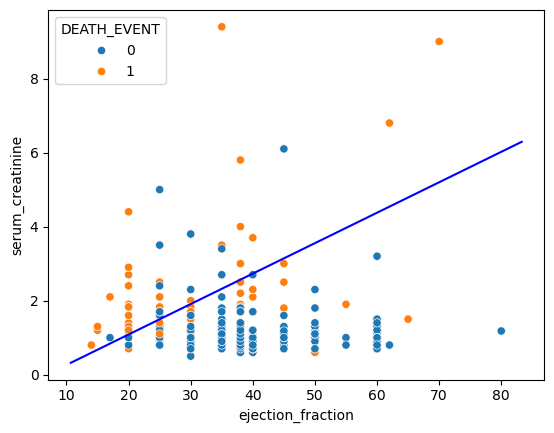

In [11]:
ax = sns.scatterplot(y='serum_creatinine', x='ejection_fraction', hue ='DEATH_EVENT', data = df)
plot_x = np.array(ax.get_xlim())
plot_y = (-1/log_reg.coef_[0,1]) * (log_reg.intercept_ + log_reg.coef_[0,0]*plot_x)
plt.plot(plot_x, plot_y, 'b')
plt.show()

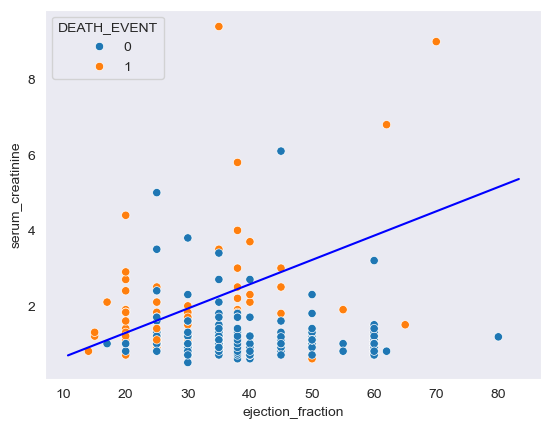

In [24]:
ax = sns.scatterplot(y='serum_creatinine', x='ejection_fraction', hue ='DEATH_EVENT', data = df)
plot_x = np.array(ax.get_xlim())
plot_y = (-1/0.808) * (-0.052*plot_x)
plt.plot(plot_x, plot_y, 'b')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

首先标准化

In [27]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cluster,predicted_labels
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0,1


In [28]:
df_pca=df[['creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine', 'serum_sodium','age','DEATH_EVENT']]
scaler = StandardScaler()
#Since the store ID has no mathematical significance, 
#standardization is not needed, so it will be excluded.
x_scaled = scaler.fit_transform(df_pca.drop('DEATH_EVENT', axis=1))
x_scaled


array([[ 1.65728387e-04, -1.53055953e+00,  1.68164843e-02,
         4.90056987e-01, -1.50403612e+00,  1.19294523e+00],
       [ 7.51463953e+00, -7.07675018e-03,  7.53566018e-09,
        -2.84552352e-01, -1.41976151e-01, -4.91279276e-01],
       [-4.49938761e-01, -1.53055953e+00, -1.03807313e+00,
        -9.09000174e-02, -1.73104612e+00,  3.50832977e-01],
       ...,
       [ 1.52597865e+00,  1.85495776e+00,  4.90208200e+00,
        -5.75030855e-01,  3.12043840e-01, -1.33339153e+00],
       [ 1.89039811e+00, -7.07675018e-03, -1.26338936e+00,
         5.92615005e-03,  7.66063830e-01, -1.33339153e+00],
       [-3.98321274e-01,  5.85388775e-01,  1.34823057e+00,
         1.99578485e-01, -1.41976151e-01, -9.12335403e-01]])

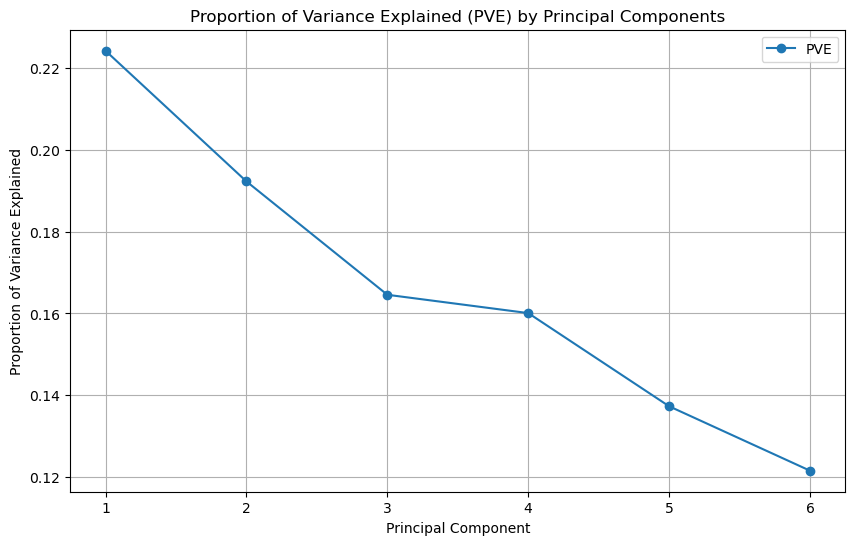

In [59]:
#Perform PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, '-o', label='PVE')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained (PVE) by Principal Components')
plt.legend()
plt.grid()
plt.show()


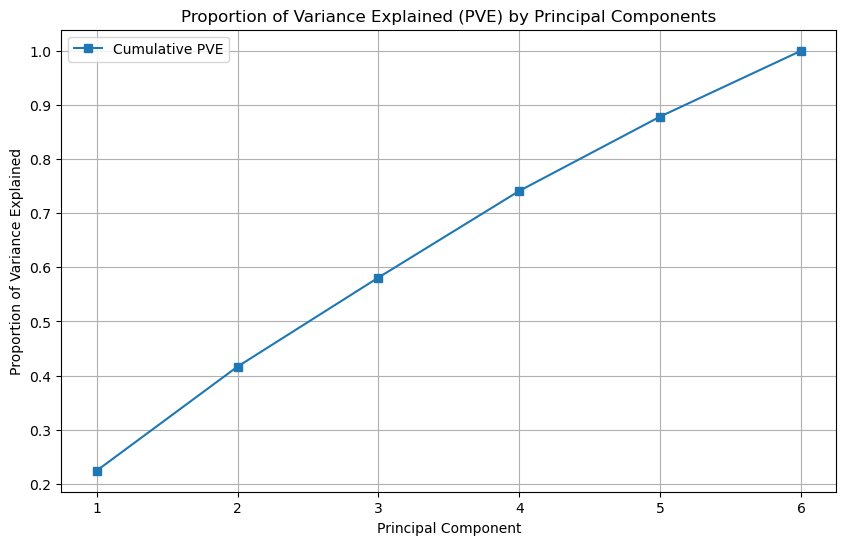

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative PVE')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained (PVE) by Principal Components')
plt.legend()
plt.grid()
plt.show()

In [61]:
x_pca_selected = x_pca[:, :5]
pca_df = pd.DataFrame(x_pca_selected, columns=[f'PC{i+1}' for i in range(5)])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.034853,-0.672180,0.348555,0.309067,1.166451
1,1.757645,-3.197428,4.446921,-4.463470,0.126126
2,-1.943501,-1.260288,-0.889904,0.236952,0.484788
3,-0.583394,-1.277827,-0.620161,0.279286,-0.150267
4,-3.904474,-1.573671,1.112159,2.150116,-0.140596


In [62]:

X = pca_df
y = df['DEATH_EVENT']
logit_model = sm.Logit(y, X).fit(disp=0)
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            4
Date:                Sun, 25 May 2025   Pseudo R-squ.:                 0.06395
Time:                        20:05:56   Log-Likelihood:                -175.67
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 7.977e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.8127      0.138     -5.898      0.000      -1.083      -0.543
PC2           -0.1182      0.124     -0.957      0.339      -0.360       0.124
PC3            0.4193      0.147      2.860      0.0

In [39]:
pca_df

,PC1,PC2,PC3,PC4,PC5
0,-2.034853,-0.672180,0.348555,0.309067,1.166451
1,1.757645,-3.197428,4.446921,-4.463470,0.126126
2,-1.943501,-1.260288,-0.889904,0.236952,0.484788
3,-0.583394,-1.277827,-0.620161,0.279286,-0.150267
4,-3.904474,-1.573671,1.112159,2.150116,-0.140596
...,...,...,...,...,...
294,0.523102,0.441639,-1.304933,-0.851018,0.129886
295,0.877041,-0.638549,0.647302,-0.775441,-0.079547
296,3.321210,0.508504,3.791495,2.349992,-0.271457
297,0.938618,-1.390832,0.186919,-1.899450,-1.001139


In [63]:
X = pca_df.drop(['PC2','PC3','PC5'],axis=1) 
y = df['DEATH_EVENT']
logit_model = sm.Logit(y, X).fit(disp=0)
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 May 2025   Pseudo R-squ.:                 0.01688
Time:                        20:06:07   Log-Likelihood:                -184.51
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                   0.01184
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.7790      0.134     -5.834      0.000      -1.041      -0.517
PC4           -0.1721      0.134     -1.288      0.198      -0.434       0.090


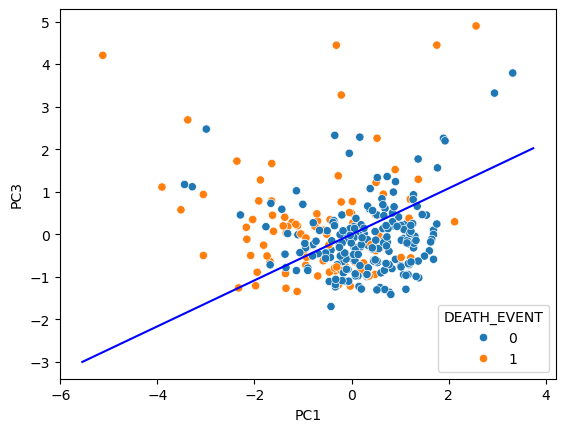

In [64]:
pca_df['DEATH_EVENT']=df['DEATH_EVENT']
ax = sns.scatterplot(x='PC1',y='PC3', hue ='DEATH_EVENT', data = pca_df)
plot_x = np.array(ax.get_xlim())
plot_y = (-1/-0.855) * (0.4621*plot_x)
plt.plot(plot_x, plot_y, 'b')
plt.show()

聚类

In [16]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


生存分析

<Axes: xlabel='timeline'>

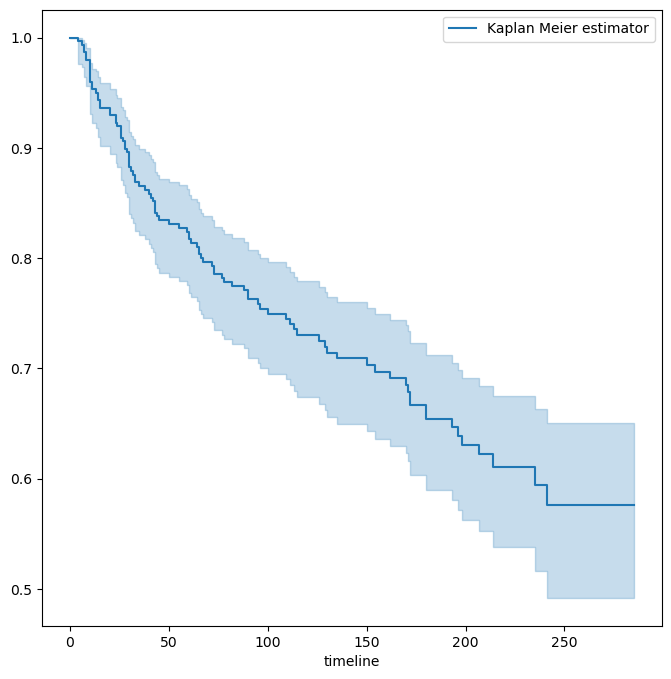

In [17]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from matplotlib.pyplot import subplots

fig, ax = subplots(figsize = (8,8))
km = KaplanMeierFitter()
km_heart_attack = km.fit(df['time'], df['DEATH_EVENT'])
km_heart_attack.plot(label = 'Kaplan Meier estimator')

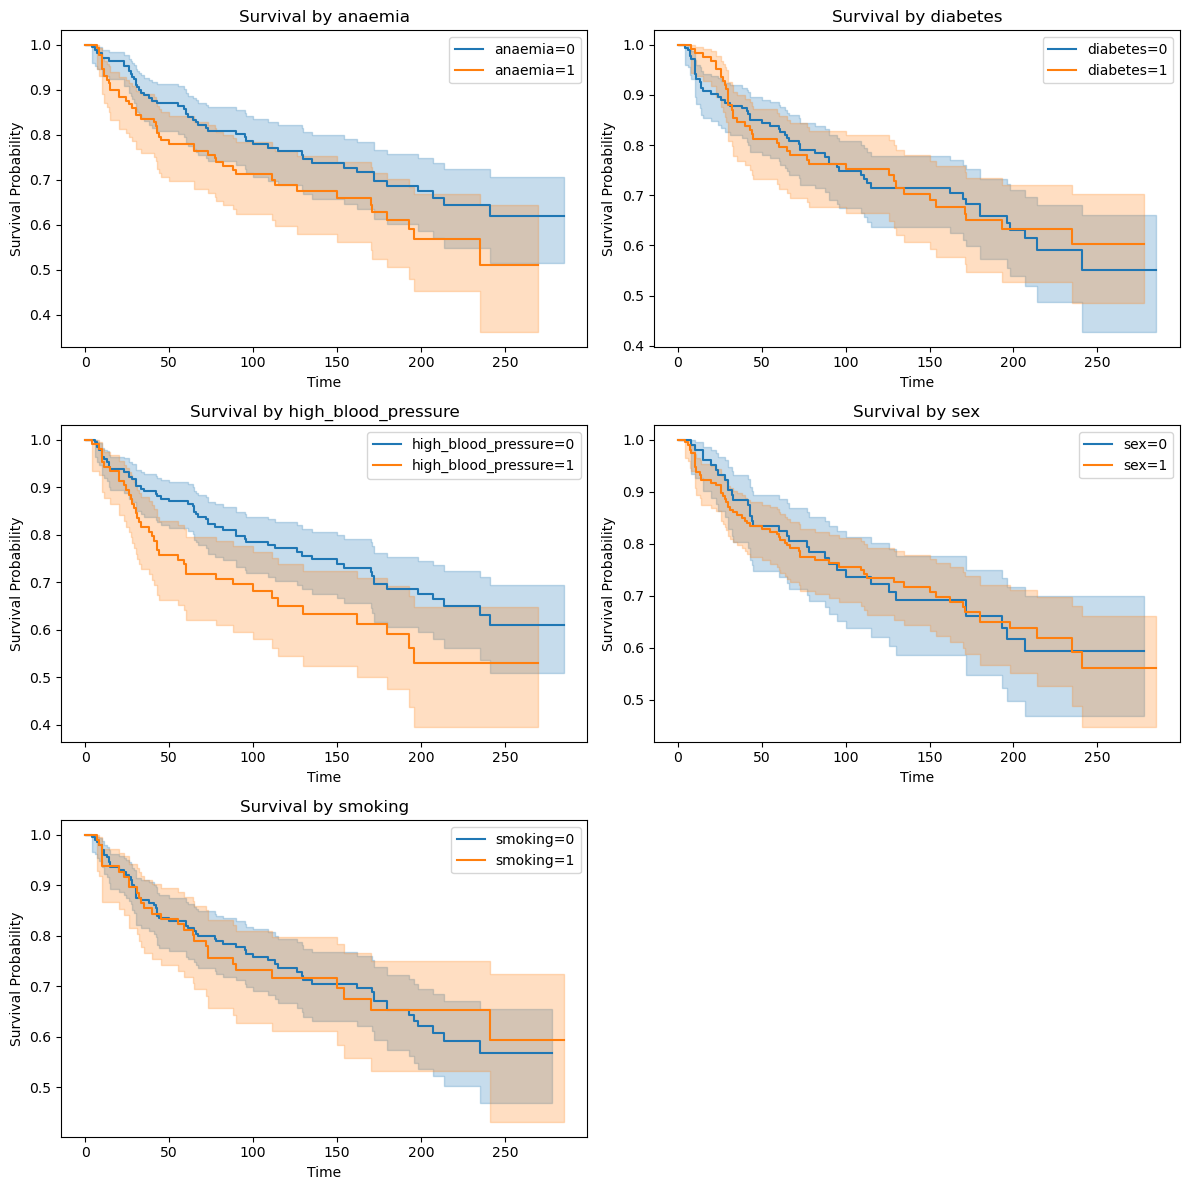

In [18]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

fig, axes = plt.subplots(3, 2, figsize=(12, 12)) 
fig.delaxes(axes[2, 1])  
axes = axes.flatten() 

km = KaplanMeierFitter()

group_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for i, var in enumerate(group_vars):
    ax = axes[i]
    for group_val, df_group in df.groupby(var):
        km.fit(df_group['time'], df_group['DEATH_EVENT'], 
              label=f'{var}={group_val}')
        km.plot(ax=ax)
    
    ax.set_title(f'Survival by {var}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Survival Probability')
    ax.legend()

plt.tight_layout()  
plt.show()

Text(0.5, 1.0, 'Complete Dendrogram')

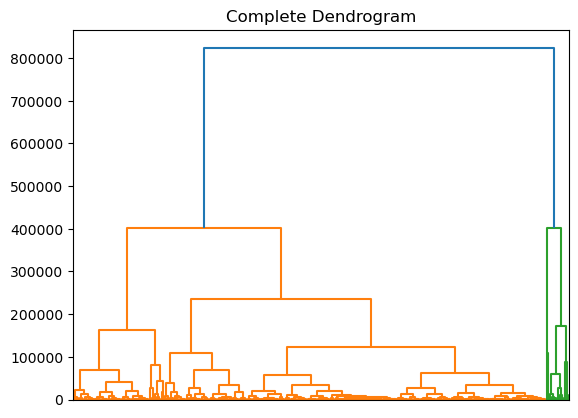

In [19]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
hc_complete = linkage(df.drop('DEATH_EVENT', axis = 1), method = 'complete')
dendrogram(hc_complete, no_labels = True)
plt.title('Complete Dendrogram')

In [94]:
# Select K=2 for clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=2, n_init=5)
clusters = kmeans.fit_predict(x_scaled)

# Add the clustering results to the original data
df['cluster'] = clusters

e:\anna\envs\pytorch_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


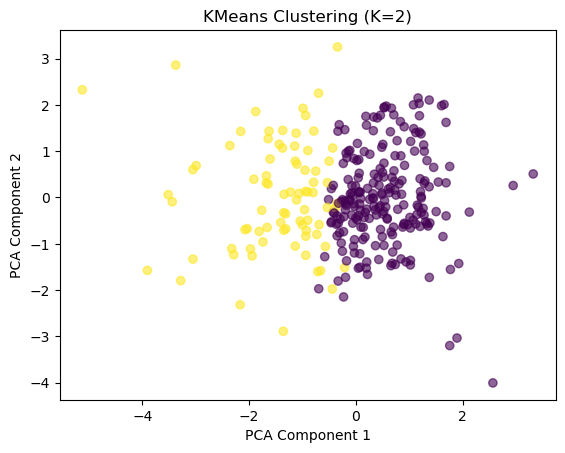

In [95]:
from sklearn.decomposition import PCA

# Reduce the dimension to 2D for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (K=2)')
plt.show()

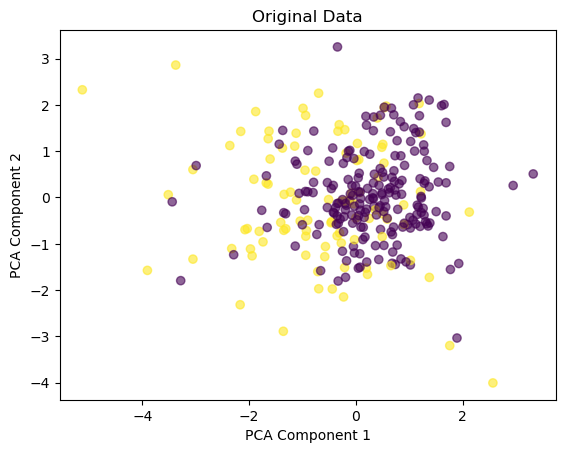

In [138]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df['DEATH_EVENT'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Original Data')
plt.show()

In [97]:
from sklearn.metrics import accuracy_score
###Correspond the first category and the second category to the labels of death and survival
df['predicted_labels'] = df['cluster']
accuracy = accuracy_score(df['DEATH_EVENT'], df['predicted_labels'])
accuracy

0.725752508361204

In [100]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cluster,predicted_labels
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1,1


假设检验

In [112]:
# Select the continuous variables that need to be tested
continuous_vars = ['creatinine_phosphokinase', 'ejection_fraction', 
                  'platelets', 'serum_creatinine', 'serum_sodium','DEATH_EVENT']

In [114]:
# Separate the dataset into stable and progressive disease groups
df=df.drop(['cluster','predicted_labels',])
anaemia_data = df[df['anaemia'] == 1].drop('anaemia', axis=1)
non_anaemia_data = df[df['anaemia'] == 0].drop('anaemia', axis=1)

In [115]:
anaemia_data[continuous_vars].mean()

creatinine_phosphokinase       369.736434
ejection_fraction               38.511628
platelets                   258450.186744
serum_creatinine                 1.455736
serum_sodium                   136.837209
DEATH_EVENT                      0.356589
dtype: float64

In [117]:
non_anaemia_data[continuous_vars].mean()

creatinine_phosphokinase       742.788235
ejection_fraction               37.758824
platelets                   267082.215647
serum_creatinine                 1.346941
serum_sodium                   136.464706
DEATH_EVENT                      0.294118
dtype: float64

In [122]:
import pandas as pd
from scipy import stats
import numpy as np

def ttest_by_group(
    df, 
    group_var, 
    continuous_vars, 
    alpha=0.05,
    equal_var=True
):
    # Obtain the group category
    groups = df[group_var].unique()
    
    group1, group2 = groups
    group1_data = df[df[group_var] == group1]
    group2_data = df[df[group_var] == group2]
    
    results = []
    
    for var in continuous_vars:
        data1 = group1_data[var]
        data2 = group2_data[var]
        # Calculate the statistics
        mean1, mean2 = data1.mean(), data2.mean()
        std1, std2 = data1.std(), data2.std()
        n1, n2 = len(data1), len(data2)
        # Automatically determine the homogeneity of variance
        equal_var = True
        if equal_var:
            _, p_levene = stats.levene(data1, data2)
            equal_var = p_levene > alpha
        
        # Perform the t-test
        t_stat, p_val = stats.ttest_ind(
            data1, data2,
            equal_var=equal_var,
            alternative='two-sided'
        )
        
        # Store the result
        results.append({
            'Variable': var,
            f'Mean ({group_var}={group1})': mean1,
            f'Mean ({group_var}={group2})': mean2,
            'Mean Difference': mean1 - mean2,
            'Std Dev Diff': np.sqrt(std1**2/n1 + std2**2/n2),
            't-statistic': t_stat,
            'p-value': p_val,
            'Equal Variance': equal_var,
            'Significant': p_val < alpha
        })
    return pd.DataFrame(results)



In [129]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,cluster,predicted_labels
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1,1


In [123]:
ttest_by_group(
        df=df,
        group_var='anaemia',
        continuous_vars=continuous_vars
    )

,Variable,Mean (anaemia=0),Mean (anaemia=1),Mean Difference,Std Dev Diff,t-statistic,p-value,Equal Variance,Significant
0,creatinine_phosphokinase,742.788235,369.736434,373.051801,100.824789,3.700001,0.000269,False,True
1,ejection_fraction,37.758824,38.511628,-0.752804,1.401001,-0.544114,0.586771,True,False
2,platelets,267082.215647,258450.186744,8632.028903,11225.659522,0.755311,0.450661,True,False
3,serum_creatinine,1.346941,1.455736,-0.108795,0.128593,-0.900370,0.368653,True,False
4,serum_sodium,136.464706,136.837209,-0.372503,0.514777,-0.722408,0.470612,True,False
5,DEATH_EVENT,0.294118,0.356589,-0.062472,0.054963,-1.144594,0.253299,True,False


In [125]:
ttest_by_group(
        df=df,
        group_var='diabetes',
        continuous_vars=continuous_vars
    )

,Variable,Mean (diabetes=0),Mean (diabetes=1),Mean Difference,Std Dev Diff,t-statistic,p-value,Equal Variance,Significant
0,creatinine_phosphokinase,589.752874,570.82400,18.928874,111.917972,0.166115,0.868180,True,False
1,ejection_fraction,38.132184,38.01600,0.116184,1.371367,0.083590,0.933439,True,False
2,platelets,255728.324598,273978.57816,-18250.253562,11889.015744,-1.595618,0.111638,True,False
3,serum_creatinine,1.435000,1.33664,0.098360,0.115372,0.810453,0.418329,True,False
4,serum_sodium,136.959770,136.16000,0.799770,0.543659,1.471087,0.142745,False,False
5,DEATH_EVENT,0.321839,0.32000,0.001839,0.054922,0.033483,0.973312,True,False


In [126]:
ttest_by_group(
        df=df,
        group_var='high_blood_pressure',
        continuous_vars=continuous_vars
    )

,Variable,Mean (high_blood_pressure=1),Mean (high_blood_pressure=0),Mean Difference,Std Dev Diff,t-statistic,p-value,Equal Variance,Significant
0,creatinine_phosphokinase,488.895238,632.144330,-143.249092,112.049769,-1.219568,0.223596,True,False
1,ejection_fraction,38.476190,37.871134,0.605056,1.468069,0.421399,0.673769,True,False
2,platelets,269989.183238,259769.002629,10220.180609,11145.386533,0.862132,0.389311,True,False
3,serum_creatinine,1.386952,1.397629,-0.010676,0.138653,-0.085041,0.932286,True,False
4,serum_sodium,136.847619,136.505155,0.342464,0.519666,0.639974,0.522683,True,False
5,DEATH_EVENT,0.371429,0.293814,0.077614,0.057619,1.371837,0.171149,True,False


In [127]:
ttest_by_group(
        df=df,
        group_var='sex',
        continuous_vars=continuous_vars
    )

,Variable,Mean (sex=1),Mean (sex=0),Mean Difference,Std Dev Diff,t-statistic,p-value,Equal Variance,Significant
0,creatinine_phosphokinase,638.701031,476.780952,161.920079,99.834041,1.379485,0.168783,True,False
1,ejection_fraction,36.793814,40.466667,-3.672852,1.477578,-2.585864,0.010190,True,True
2,platelets,254370.249897,279964.021619,-25593.771722,12053.134990,-2.173367,0.030543,True,True
3,serum_creatinine,1.399175,1.384095,0.015080,0.130227,0.120118,0.904471,True,False
4,serum_sodium,136.536082,136.790476,-0.254394,0.563117,-0.475247,0.634961,True,False
5,DEATH_EVENT,0.319588,0.323810,-0.004222,0.056851,-0.074388,0.940752,True,False


In [133]:
ttest_by_group(
        df=df,
        group_var='smoking',
        continuous_vars=continuous_vars
    )

,Variable,Mean (smoking=0),Mean (smoking=1),Mean Difference,Std Dev Diff,t-statistic,p-value,Equal Variance,Significant
0,creatinine_phosphokinase,580.226601,585.250000,-5.023399,123.229065,-0.041727,0.966744,True,False
1,ejection_fraction,38.630542,36.927083,1.703459,1.418173,1.162716,0.245878,True,False
2,platelets,261462.209261,267366.898646,-5904.689385,12802.061636,-0.486778,0.626775,True,False
3,serum_creatinine,1.413350,1.352708,0.060641,0.128657,0.472624,0.636828,True,False
4,serum_sodium,136.610837,136.656250,-0.045413,0.546052,-0.082950,0.933947,True,False
5,DEATH_EVENT,0.325123,0.312500,0.012623,0.057860,0.217561,0.827921,True,False


In [139]:
import pandas as pd
import numpy as np
from scipy import stats

continuous_vars = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']
p_values = {}

# Conduct a t-test on continuous variables (assuming a normal distribution)
for var in continuous_vars:
    group0 = df[df['DEATH_EVENT'] == 0][var]
    group1 = df[df['DEATH_EVENT'] == 1][var]
    _, p = stats.ttest_ind(group0, group1, equal_var=False)  # Welch's t-test
    p_values[var] = p

# Categorical variable: Chi-square test
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['DEATH_EVENT'])
    _, p, _, _ = stats.chi2_contingency(contingency_table)
    p_values[var] = p

p_df = pd.DataFrame({'Feature': list(p_values.keys()), 'p_value': list(p_values.values())})
print("Original p-values:\n", p_df.sort_values('p_value'))

Original p-values:
                Feature   p_value
1    ejection_fraction  0.000010
0                  age  0.000047
2     serum_creatinine  0.000064
3         serum_sodium  0.001872
6  high_blood_pressure  0.214103
4              anaemia  0.307316
7              smoking  0.931765
5             diabetes  1.000000


In [140]:
from statsmodels.stats.multitest import multipletests

# Extract the list of p-values
pvals = p_df['p_value'].values

# Holm-Bonferroni
reject, p_holm, _, _ = multipletests(pvals, alpha=0.05, method='holm')


p_df['p_holm'] = p_holm
p_df['reject_holm'] = reject
p_df['significance'] = np.where(reject, '*', 'NS')  # Whether the mark is significant

print("\nHolm-Bonferroni correction results:")
print(p_df.sort_values('p_value').round(4))


Holm-Bonferroni correction results:
               Feature  p_value  p_holm  reject_holm significance
1    ejection_fraction   0.0000  0.0001         True            *
0                  age   0.0000  0.0003         True            *
2     serum_creatinine   0.0001  0.0004         True            *
3         serum_sodium   0.0019  0.0094         True            *
6  high_blood_pressure   0.2141  0.8564        False           NS
4              anaemia   0.3073  0.9219        False           NS
7              smoking   0.9318  1.0000        False           NS
5             diabetes   1.0000  1.0000        False           NS
